In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 이미지 데이터 경로 지정
data_dir = 'dataset'


print(data_dir)
# 이미지 데이터 전처리
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # 픽셀 값을 0-1 범위로 조정하고, 검증 데이터로 20% 사용

train_data = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=20, class_mode='binary', subset='training')
valid_data = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=20, class_mode='binary', subset='validation')

# CNN 모델 생성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




dataset
Found 108800 images belonging to 3 classes.
Found 27200 images belonging to 3 classes.


Epoch 1/100
29/29 [==============================] - 7s 238ms/step - loss: 0.4326 - accuracy: 0.8174 - val_loss: 0.4855 - val_accuracy: 0.7762
Epoch 2/100
29/29 [==============================] - 7s 227ms/step - loss: 0.0589 - accuracy: 0.9809 - val_loss: 0.7187 - val_accuracy: 0.8392
Epoch 3/100
29/29 [==============================] - 7s 232ms/step - loss: 0.0087 - accuracy: 0.9965 - val_loss: 0.7507 - val_accuracy: 0.8252
Epoch 4/100
29/29 [==============================] - 7s 243ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8088 - val_accuracy: 0.8531
Epoch 5/100
29/29 [==============================] - 7s 248ms/step - loss: 6.7266e-04 - accuracy: 1.0000 - val_loss: 0.7896 - val_accuracy: 0.8392
Epoch 6/100
29/29 [==============================] - 7s 255ms/step - loss: 4.2333e-04 - accuracy: 1.0000 - val_loss: 0.8536 - val_accuracy: 0.8462
Epoch 7/100
29/29 [==============================] - 7s 239ms/step - loss: 2.9922e-04 - accuracy: 1.0000 - val_loss: 0.8205 - val_accu

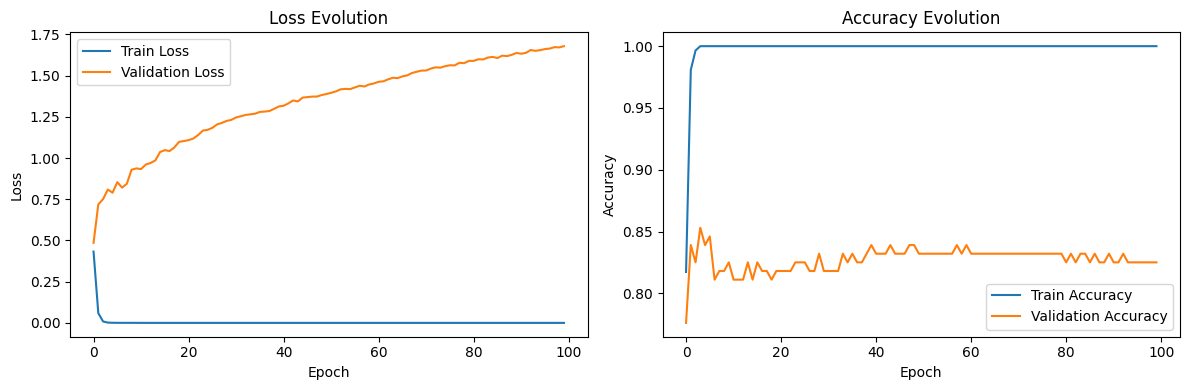

In [2]:


from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=2000, callbacks=[model_checkpoint])

# 모델 훈련 (History 객체를 받습니다)
# history = model.fit(train_data, validation_data=valid_data, epochs=100)

historty = model_checkpoint


In [ ]:
# 손실률 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
model.save('fog_classifier_ver3.h5')  # h5 확장자로 모델 저장

c:\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
# 모델 불러오기
# from tensorflow.keras.models import load_model

# model = load_model('fog_classifier.h5')  # 저장한 모델 불러오기


In [7]:

# 예측하고자 하는 이미지 파일 경로
img_path = '36_26.png'

# 이미지 로딩 및 전처리
img = image.load_img(img_path, target_size=(150, 150)) # 이미지 로딩 및 크기 조정
img_array = image.img_to_array(img) # 이미지를 numpy 배열로 변환
img_array = np.expand_dims(img_array, axis=0) # 이미지에 batch 차원 추가
img_array /= 255. # 모델 훈련 때와 동일하게 픽셀 값을 0-1 범위로 스케일링

# 이미지에 대한 예측 수행
prediction = model.predict(img_array)

print(prediction)
# 예측 결과 출력
if prediction > 0.5:
    print("이미지에 안개가 있습니다.")
else:
    print("이미지에 안개가 없습니다.")


1/1 [==============================] - 0s 20ms/step
[[1.]]
이미지에 안개가 있습니다.


In [6]:

# 예측하고자 하는 이미지 파일 경로
img_path = 'No_fog_test.jpg'

# 이미지 로딩 및 전처리
img = image.load_img(img_path, target_size=(150, 150)) # 이미지 로딩 및 크기 조정
img_array = image.img_to_array(img) # 이미지를 numpy 배열로 변환
img_array = np.expand_dims(img_array, axis=0) # 이미지에 batch 차원 추가
img_array /= 255. # 모델 훈련 때와 동일하게 픽셀 값을 0-1 범위로 스케일링

# 이미지에 대한 예측 수행
prediction = model.predict(img_array)

print(prediction)
# 예측 결과 출력
if prediction > 0.5:
    print("이미지에 안개가 있습니다.")
else:
    print("이미지에 안개가 없습니다.")


1/1 [==============================] - 0s 19ms/step
[[0.14380623]]
이미지에 안개가 없습니다.
